In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Rate of convergence
def rate(xk, a):
    p = []
    
    for i in range(len(xk) - 1):
        p.append(np.log2(np.abs(xk[i+1] - a))/np.log2(np.abs(xk[i] - a)))
        
    return p

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Bisection method</h1>

In [3]:
def bisection_method(f, a, b, zeros=None, tol=0.001):
    if zeros == None: 
        zeros = []
        
    if (b-a) < tol:
        zeros.append((a, b))
        return
        
    midpoint = (a + b)/2
    
    if f(a)*f(midpoint) < 0:
        bisection_method(f, a, midpoint, zeros=zeros, tol=tol)
        
    if f(midpoint)*f(b) < 0:
        bisection_method(f, midpoint, b, zeros=zeros, tol=tol)
        
    return zeros

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Chord method</h1>

In [10]:
def Chord_method(f, a, b, x0, tol=0.01, max_iter=1000):
    x_k = x0
    
    q = (f(b) - f(a)) / (b - a)
    x_kp1 = x_k - f(x_k) / q

    k_plot = [x_kp1]
    
    iterations = 0
    while not(np.abs(x_kp1 - x_k) < tol and np.abs(f(x_kp1)) < tol):
        x_k = x_kp1
        x_kp1 = x_k - f(x_k) / q
        
        k_plot.append(x_kp1)
        iterations += 1
        
        if iterations > max_iter:
            return None, k_plot
        
    return x_kp1, k_plot

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Secant method</h1>

In [5]:
def secant_method(f, a, b, tol=0.01, max_iter=1000):
    x_km1 = b
    x_k = a
    
    q = (f(x_k) - f(x_km1)) / (x_k - x_km1)
    x_kp1 = x_k - f(x_k) / q

    k_plot = [x_kp1]
    
    iterations = 0
    while not(np.abs(x_kp1 - x_k) < tol and np.abs(f(x_kp1)) < tol):
        x_km1 = x_k
        x_k = x_kp1

        q = (f(x_k) - f(x_km1)) / (x_k - x_km1)
        x_kp1 = x_k - f(x_k) / q  
                
        k_plot.append(x_kp1)
        iterations += 1
        if iterations > max_iter:
            return None, k_plot
        
    return x_kp1, k_plot

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Newton's method</h1>

In [13]:
def Newtons_method(f, df, x0, tol=0.001, max_iter=1000):
    x_k = x0
    x_kp1 = x_k - f(x_k)/df(x_k)
    
    k_plot = [x_kp1]
    
    iterations = 0
    while not(np.abs(x_kp1 - x_k) < tol and np.abs(f(x_kp1)) < tol):
        x_k = x_kp1
        x_kp1 = x_k - f(x_k)/df(x_k)
        
        k_plot.append(x_kp1)
        iterations += 1
        if iterations > max_iter:
            return None, k_plot
        
    return x_kp1, k_plot

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Testing</h1>


In [7]:
# Functions to test
fs = [
    lambda x: x**2 - x - 2,
    lambda x: np.sqrt(x+2) - x,
    lambda x: 1 + 2/x - x,
    lambda x: x + 2*(np.log(x) - 1),
    lambda x: np.exp(x) - x**2,
    lambda x: 1/x - np.exp(np.sqrt(x)),
    lambda x: x - np.exp(-x**2),
    lambda x: x**3 - np.sin(x)
]

dfs = [
    lambda x: 2*x - 1,
    lambda x: 1/(2*np.sqrt(x+2)) - 1,
    lambda x: - 2/x**2 - 1,
    lambda x: 1 + 2/np.abs(x),
    lambda x: np.exp(x) - 2*x,
    lambda x: -1/x**2 - np.exp(np.sqrt(x))/(2*np.sqrt(x)),
    lambda x: 1 + 2*x*np.exp(-x**2),
    lambda x: 3*x**2 - np.cos(x)    
]

## Bisection method

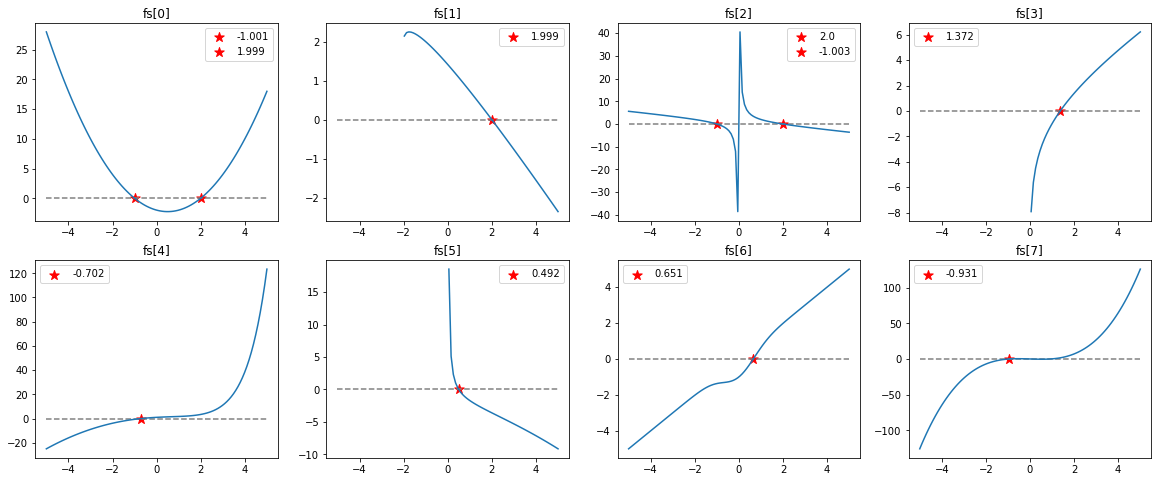

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

a = -5
b = 7
x = np.linspace(-5, 5, 100)

for i, row in enumerate(axes):
    for j, ax in enumerate(row):

        f = fs[4*i+j]

        ax.plot(x, f(x))
        ax.hlines(y=0, xmin=-5, xmax=5, color='gray', linestyles='dashed')
        ax.title.set_text(f'fs[{4*i+j}]')

        zeros = bisection_method(f, a, b, tol=0.01)
        
        if 4*i+j == 2:
            zeros = [*bisection_method(f, 0.1, 4, tol=0.01), *bisection_method(f, -4, -0.1, tol=0.01)]
        elif 4*i+j == 5:
            zeros = bisection_method(f, 0.1, 4, tol=0.01)

        for (xmin, xmax) in zeros:
            m = (xmin+xmax)/2
            ax.scatter(m, 0, marker="*", color='red', s=100, label=round(m, 3))
            ax.legend()
            
plt.show()

## Chord method

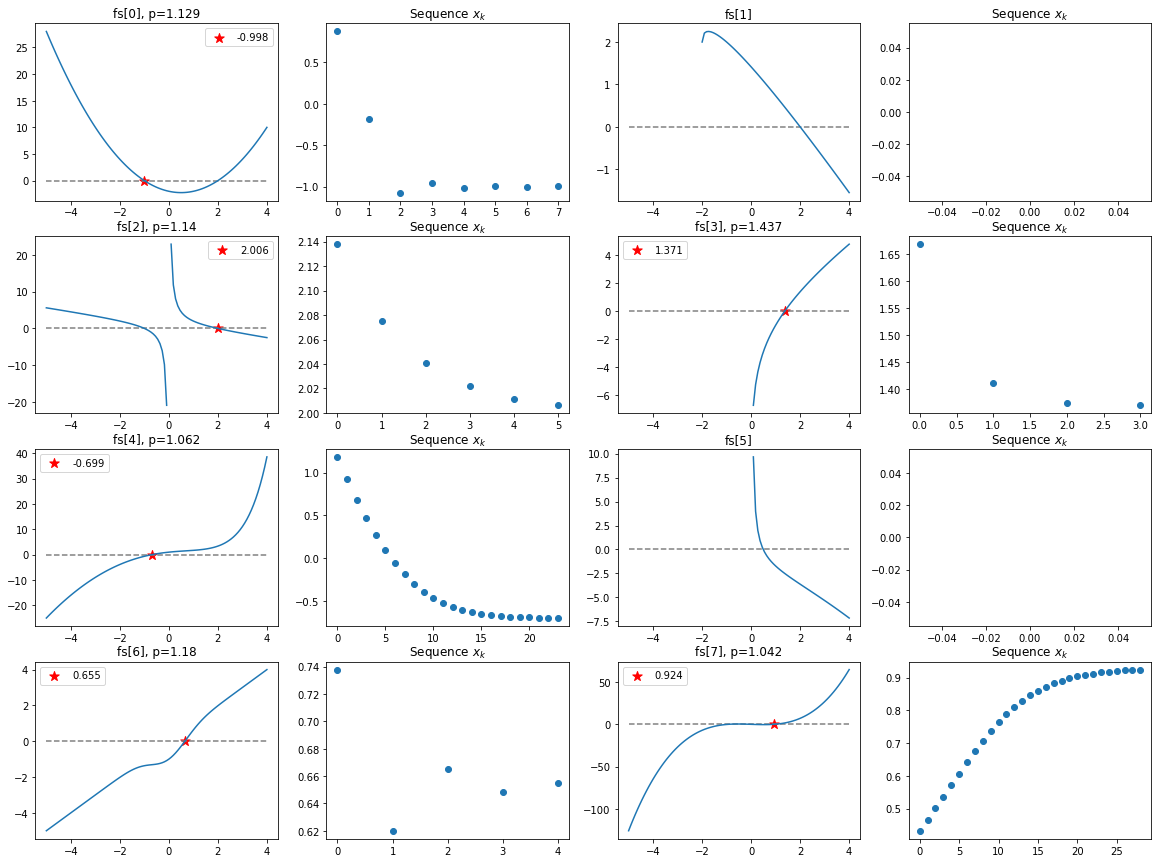

In [11]:
fig, axes = plt.subplots(4, 4, figsize=(20, 15))

a = -5
b = 4
x = np.linspace(a, b, 100)
x0 = 1.5

for i, row in enumerate(axes):
    for j, ax in enumerate(row):

        if j%2 == 0:
            f = fs[2*i + j//2]

            ax.plot(x, f(x))
            ax.hlines(y=0, xmin=a, xmax=b, color='gray', linestyles='dashed')
            ax.title.set_text(f'fs[{2*i + j//2}]')

            x_sol, xk = Chord_method(f, a, b, x0, tol=0.01)
            
            if i % 2 == 1:
                x_sol, xk = Chord_method(f, 0.3, 3, 0.4, tol=0.01)

            if x_sol:
                p = rate(xk, root(f, x_sol)['x'])
                ax.scatter(x_sol, 0, marker="*", color='red', s=100, label=round(x_sol, 3))
                ax.title.set_text(f'fs[{2*i + j//2}], p={round(p[-1][0], 3)}')
                ax.legend()
                
        if j%2 == 1:
            ax.scatter(list(range(len(xk))), xk)
            ax.title.set_text(r'Sequence $x_k$')
            
plt.show()

## Secant method

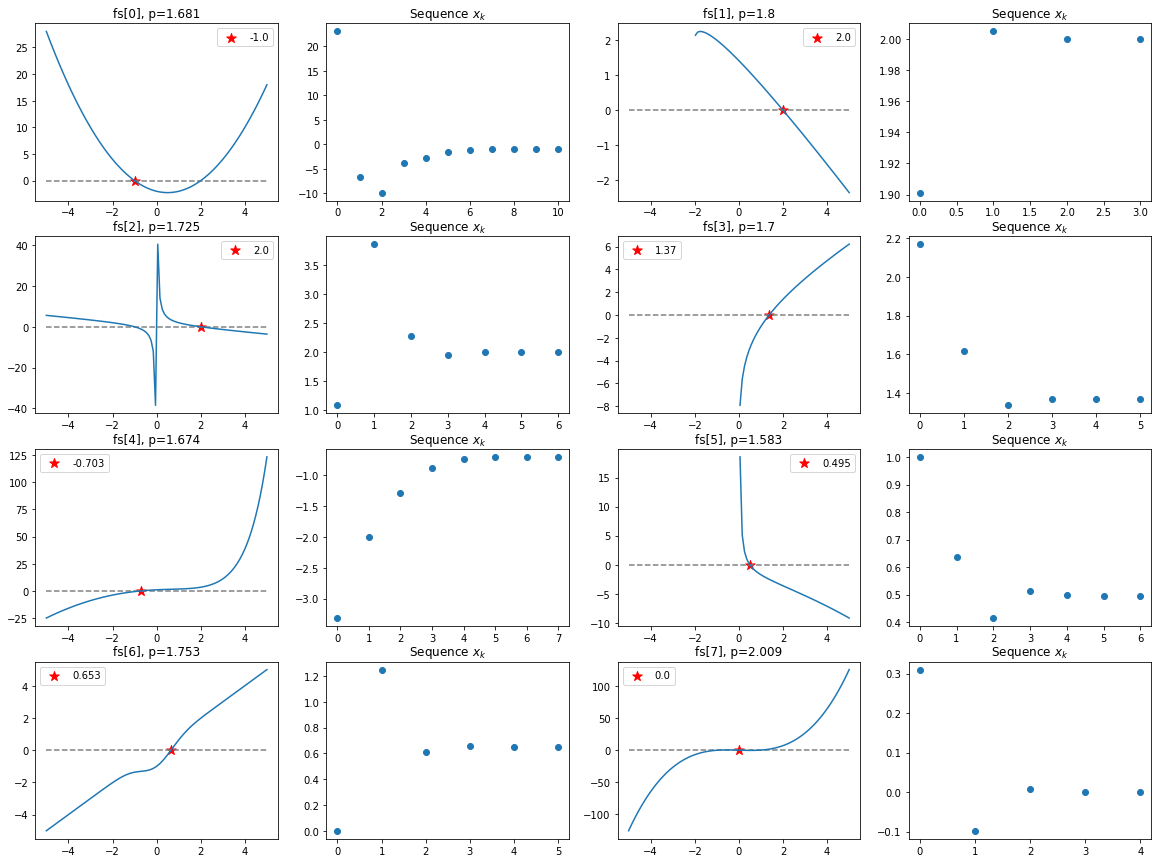

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(20, 15))

a = -5
b = 5
x = np.linspace(a, b, 100)

for i, row in enumerate(axes):
    for j, ax in enumerate(row):

        if j%2 == 0:
            f = fs[2*i + j//2]

            ax.plot(x, f(x))
            ax.hlines(y=0, xmin=a, xmax=b, color='gray', linestyles='dashed')
            ax.title.set_text(f'fs[{2*i + j//2}]')

            if j == 0:
                x_sol, xk = secant_method(f, a, b, tol=0.0001)
            elif j == 2:
                x_sol, xk = secant_method(f, 0.3, b, tol=0.0001)

            if x_sol:
                p = rate(xk, root(f, x_sol)['x'])
                ax.scatter(x_sol, 0, marker="*", color='red', s=100, label=round(x_sol, 3))
                ax.title.set_text(f'fs[{2*i + j//2}], p={round(p[-1][0], 3)}')
                ax.legend()
                
        if j%2 == 1:
            ax.scatter(list(range(len(xk))), xk)
            ax.title.set_text(r'Sequence $x_k$')
            
plt.show()

## Newton's method

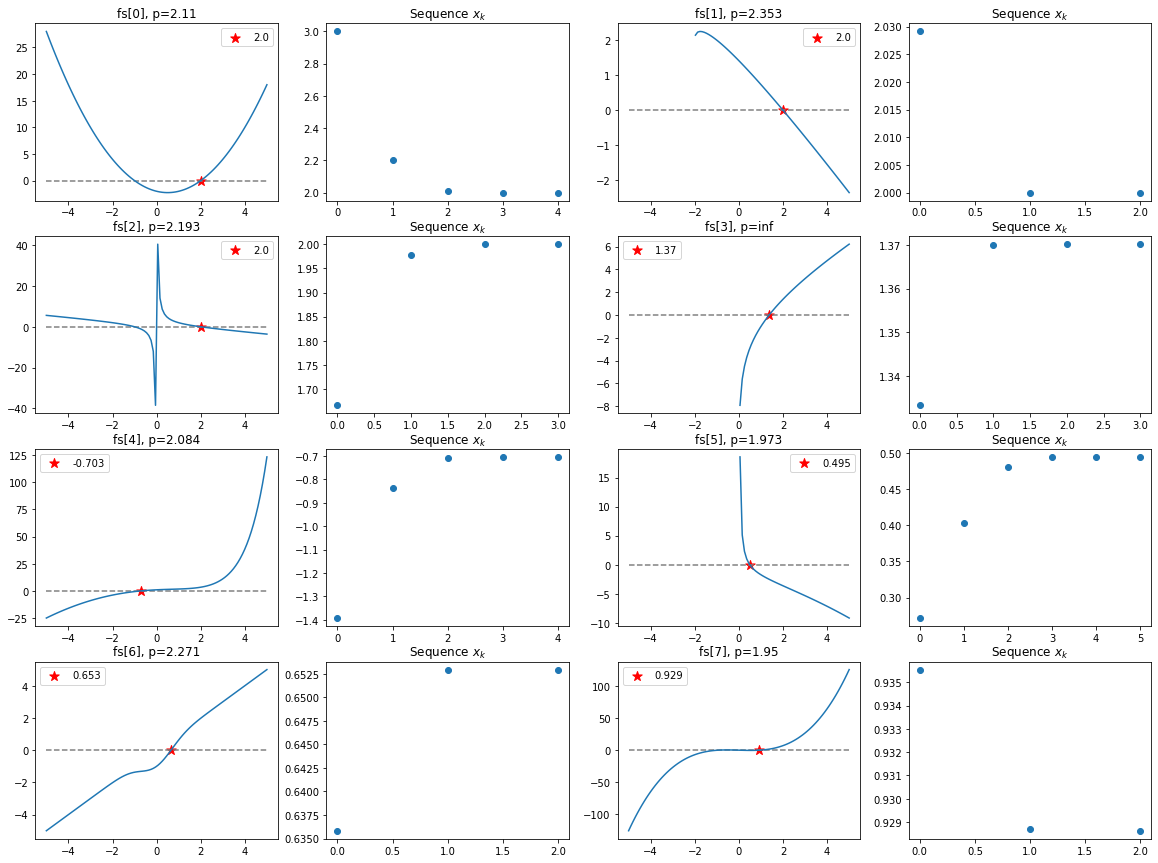

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(20, 15))

a = -5
b = 5
x = np.linspace(a, b, 100)
x0 = 1

for i, row in enumerate(axes):
    for j, ax in enumerate(row):

        if j%2 == 0:
            f = fs[2*i + j//2]
            df = dfs[2*i + j//2]

            ax.plot(x, f(x))
            ax.hlines(y=0, xmin=a, xmax=b, color='gray', linestyles='dashed')
            ax.title.set_text(f'fs[{2*i + j//2}]')

            x_sol, xk = Newtons_method(f, df, x0, tol=0.0001)
            
            if x_sol:
                p = rate(xk, root(f, x_sol)['x'])
                ax.scatter(x_sol, 0, marker="*", color='red', s=100, label=round(x_sol, 3))
                ax.title.set_text(f'fs[{2*i + j//2}], p={round(p[-1][0], 3)}')
                ax.legend()
                
        if j%2 == 1:
            ax.scatter(list(range(len(xk))), xk)
            ax.title.set_text(r'Sequence $x_k$')
            
plt.show()

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">2D Generalization</h1>

In [40]:
def Newtons_method_2d(f, J, x0, tol=0.01): 
    x_k = x0
    J_inv = np.linalg.inv(J(x_k))
    x_kp1 = x_k - J_inv @ f(x_k)
    
    k_plot = [x_kp1]
    
    while not (np.linalg.norm(x_kp1 - x_k) < tol and np.linalg.norm(f(x_kp1)) < tol):
        x_k = x_kp1
        J_inv = np.linalg.inv(J(x_k))
        x_kp1 = x_k - J_inv @ f(x_k)
                
        k_plot.append(x_kp1)
        
    return x_k, k_plot

In [44]:
def Newtons_method_2d_approx(f, x0, tol=0.01): 
    x_k = x0
    
    J_inv = np.array([
            [(f(x_k+np.array([[0.001], [0]]))[0] - f(x_k)[0])/0.001, (f(x_k+np.array([[0], [0.001]]))[0] - f(x_k)[0])/0.001],
            [(f(x_k+np.array([[0.001], [0]]))[1] - f(x_k)[1])/0.001, (f(x_k+np.array([[0], [0.001]]))[1] - f(x_k)[1])/0.001]
        ]).reshape(2, 2)
        
    J_inv = np.linalg.inv(J_inv)
        
    x_kp1 = x_k - J_inv @ f(x_k)
    
    k_plot = [x_kp1]
    
    while not (np.linalg.norm(x_kp1 - x_k) < tol and np.linalg.norm(f(x_kp1)) < tol):
        x_k = x_kp1

        J_inv = np.array([
            [(f(x_k+np.array([[0.001], [0]]))[0] - f(x_k)[0])/0.001, (f(x_k+np.array([[0], [0.001]]))[0] - f(x_k)[0])/0.001],
            [(f(x_k+np.array([[0.001], [0]]))[1] - f(x_k)[1])/0.001, (f(x_k+np.array([[0], [0.001]]))[1] - f(x_k)[1])/0.001]
        ]).reshape(2, 2)
        
        J_inv = np.linalg.inv(J_inv)
        x_kp1 = x_k - J_inv @ f(x_k)
                
        k_plot.append(x_kp1)
        
    return x_k, k_plot

In [61]:
f = lambda x: np.array([[x[0, 0] + 2*x[1, 0] - 3], [2*x[0, 0]**2 + x[1, 0]**2 - 5]])
J = lambda x: np.array([[1, 2], [4*x[0, 0], 2*x[1, 0]]])

x0 = np.array([[1], [1]])

st = time.process_time()
x_k, k_plot = Newtons_method_2d_approx(f, x0)
et = time.process_time()

print(f'The zero of the function is : ({x_k[0][0]:.3f}, {x_k[1][0]:.3f})')
print(f'Number of iterations: {len(k_plot)}')
print(f'CPU Execution time: {et-st} seconds')

The zero of the function is : (1.488, 0.756)
Number of iterations: 4
CPU Execution time: 0.0 seconds


In [14]:
f = lambda x: np.array([[x[0, 0]**2 + x[1, 0]**2 - 1], [np.sin(x[0, 0]*np.pi/2) + x[1, 0]**3]])
J = lambda x: np.array([[2*x[0, 0], 2*x[1, 0]], [np.pi/2 * np.cos(np.pi/2 * x[0, 0]), 3*x[1, 0]**2]])

x0 = np.array([[1], [-1]])

x_k, k_plot = Newtons_method_2d(f, J, x0)

print(f'The zero of the function is : ({x_k[0][0]:.3f}, {x_k[1][0]:.3f})')

The zero of the function is : (0.476, -0.880)


In [49]:
rate(k_plot, root(f, x_k, method='diagbroyden')['x'])

[array([[1.],
        [1.]]),
 array([[1.],
        [1.]]),
 array([[1.],
        [1.]])]